![Example Image](Images/image.png)


## Unraveling the Challenges of Unemployment in Africa: A Data-Driven Approach

>       General Overview

Unemployment remains one of the most daunting challenges facing African nations today. It is a multifaceted problem with deep roots in socio-economic, educational, and policy-related factors. This case study invites analysts and policymakers to delve into various datasets to uncover insights and strategies that could assist in mitigating the unemployment crisis in Africa.


>       Objective


The primary goal of this case study is to analyze data, identify patterns, and propose informed, data-driven recommendations that governments and stakeholders can implement to effectively address and reduce unemployment rates, particularly focusing on the African context.

In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import parallel_coordinates

import os
import sqlite3
import math
from collections import Counter
from pathlib import Path
from tqdm import tqdm
import scipy.stats as stats

# Visualization
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objects as go
import plotly.express as px 
from plotly.subplots import make_subplots
import plotly.io as pio
%matplotlib inline


### Loading the Dataset

In [54]:
def read_csv_file(file_path, encoding='utf-8'):
    try:
        return pd.read_csv(file_path, encoding=encoding)
    except UnicodeDecodeError:
        # Trying with a different encoding
        return pd.read_csv(file_path, encoding='ISO-8859-1')

country_codes = read_csv_file(r"6. Country Codes.csv")
firms_historical = pd.read_excel(r"5. Total_firms_Historical_data.xlsx")
population_access_electricity = read_csv_file(r"4. share-of-the-population-with-access-to-electricity.csv")
education_expenditure = read_csv_file(r"3. share-of-education-in-government-expenditure.csv")
strategy_youth_employment = read_csv_file(r"2. national-strategy-for-youth-employment.csv")
unemployment_rate = read_csv_file(r"1. unemployment-rate-men-vs-women.csv")


In [44]:
#Filtering the three letter codes for Africa
Africa = country_codes[country_codes["region"] == "Africa"]
Africa["alpha-3"]

3      DZA
6      AGO
23     BEN
29     BWA
32     IOT
35     BFA
36     BDI
37     CPV
39     CMR
42     CAF
43     TCD
49     COM
50     COG
51     COD
54     CIV
61     DJI
65     EGY
67     GNQ
68     ERI
70     SWZ
71     ETH
79     ATF
80     GAB
81     GMB
84     GHA
93     GIN
94     GNB
116    KEN
125    LSO
126    LBR
127    LBY
132    MDG
133    MWI
136    MLI
140    MRT
141    MUS
142    MYT
150    MAR
151    MOZ
153    NAM
160    NER
161    NGA
181    REU
184    RWA
186    SHN
194    STP
196    SEN
198    SYC
199    SLE
205    SOM
206    ZAF
208    SSD
211    SDN
219    TZA
222    TGO
226    TUN
231    UGA
245    ESH
247    ZMB
248    ZWE
Name: alpha-3, dtype: object

### Extracting data for Africa

In [55]:
africa_country_codes = country_codes[country_codes["alpha-3"].isin(Africa["alpha-3"])]

africa_firms_historical = firms_historical[firms_historical["Economy"].isin(Africa["name"])]

africa_population_access_electricity = population_access_electricity[population_access_electricity["Code"].isin(Africa["alpha-3"])]

africa_education_expenditure = education_expenditure[education_expenditure["Code"].isin(Africa["alpha-3"])]

africa_strategy_youth_employment = strategy_youth_employment[strategy_youth_employment["Code"].isin(Africa["alpha-3"])]

africa_unemployment_rate = unemployment_rate[unemployment_rate["Code"].isin(Africa["alpha-3"])]

In [ ]:
# Data Overview
# Participants will engage with six diverse datasets, each offering a unique perspective on factors influencing unemployment:

# 1. Unemployment Rate (Men vs. Women): This dataset provides a comparative view of unemployment rates between genders.

# 2. National Strategy for Youth Employment: This dataset outlines various national strategies adopted across different African countries to 
# combat youth unemployment. 

# 3. Share of Education in Government Expenditure: Education is a critical factor in employment. This dataset sheds light on how much 
# governments are investing in education.

# 4. Population with Access to Electricity: Access to electricity is a fundamental driver of economic development and can influence employment 
# opportunities. This dataset provides insights into the availability of electricity across different regions and its potential impact 
# on employment.

# 5. Total Firms (Historical Data): The health of a country's private sector is directly linked to employment rates. This dataset includes 
# historical data on the number of firms.

# 6. Country Codes: This dataset is essential for mapping data points to specific African countries, enabling a more precise and geographically 
# contextual analysis.

### Unemployment trends for different regions in Africa (by Gender)

In [106]:
# Manually create a mapping of countries to regions
regions = {
    'West Africa': ['Benin', 'Burkina Faso', 'Cape Verde', "Cote d'Ivoire", 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Liberia', 'Mali', 'Mauritania', 'Niger', 'Nigeria', 'Senegal', 'Sierra Leone', 'Togo'],
    'East Africa': ['Burundi', 'Comoros', 'Djibouti', 'Eritrea', 'Ethiopia', 'Kenya', 'Madagascar', 'Malawi', 'Mauritius', 'Mayotte', 'Mozambique', 'Reunion', 'Rwanda', 'Seychelles', 'Somalia', 'South Sudan', 'Tanzania', 'Uganda', 'Zambia', 'Zimbabwe'],
    'North Africa': ['Algeria', 'Egypt', 'Libya', 'Morocco', 'Tunisia', 'Western Sahara'],
    'Southern Africa': ['Botswana', 'Eswatini', 'Lesotho', 'Namibia', 'South Africa'],
    'Central Africa': ['Angola', 'Cameroon', 'Central African Republic', 'Chad', 'Congo', 'Democratic Republic of Congo', 'Equatorial Guinea', 'Gabon', 'Sao Tome and Principe']
}

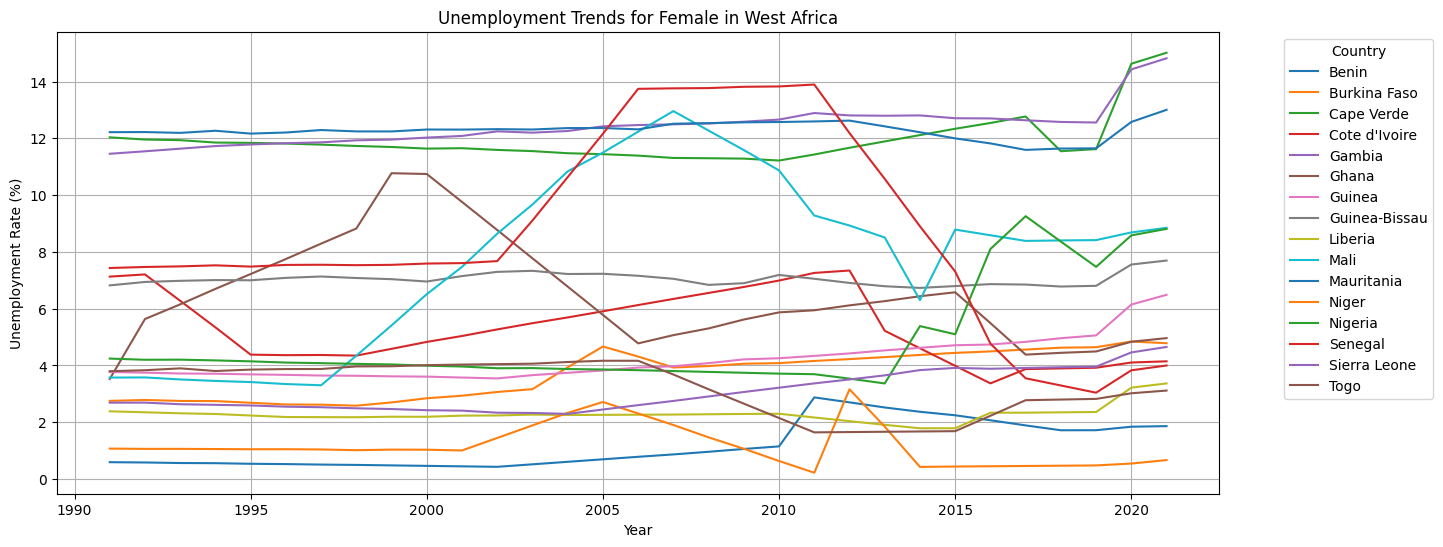

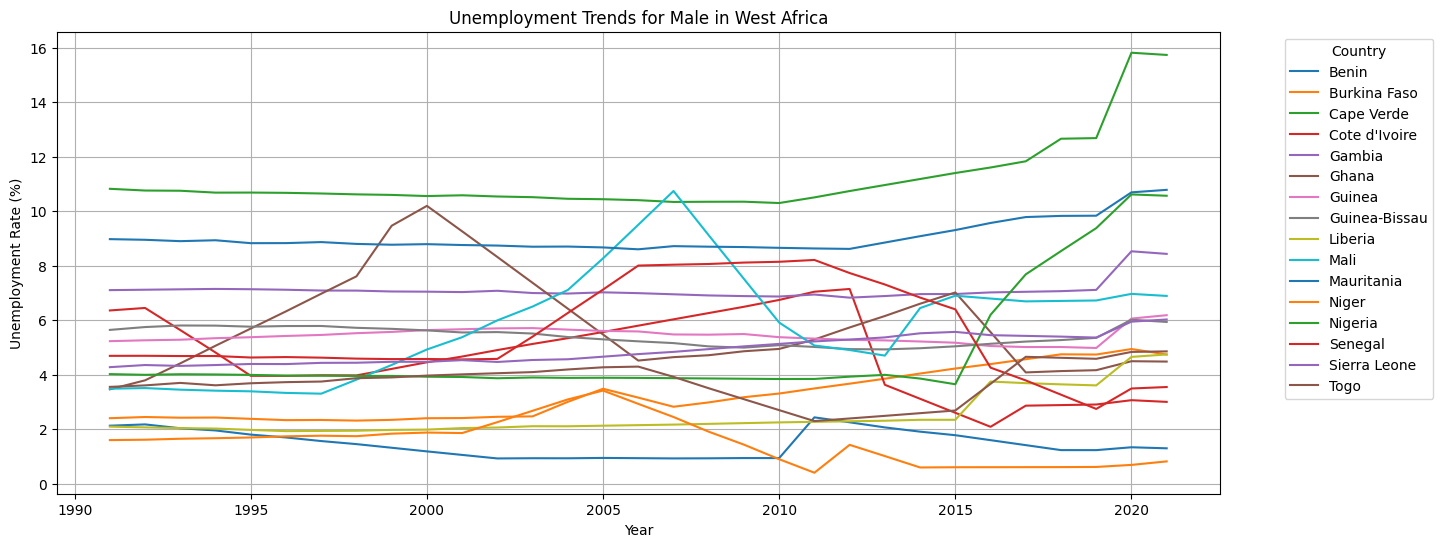

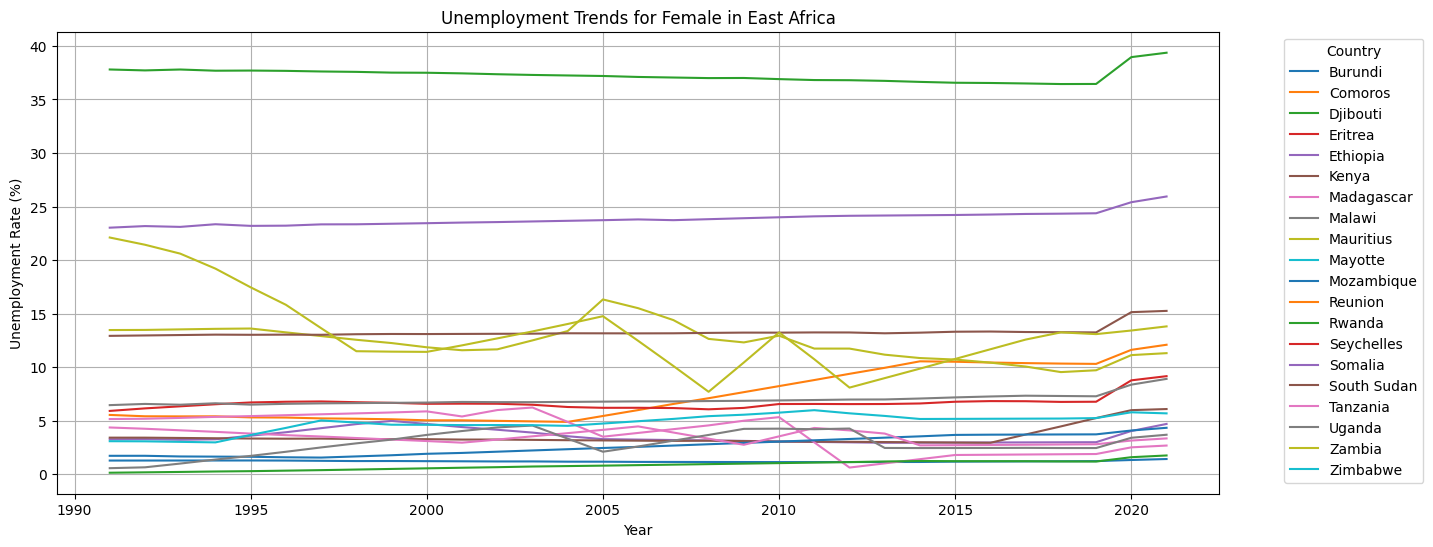

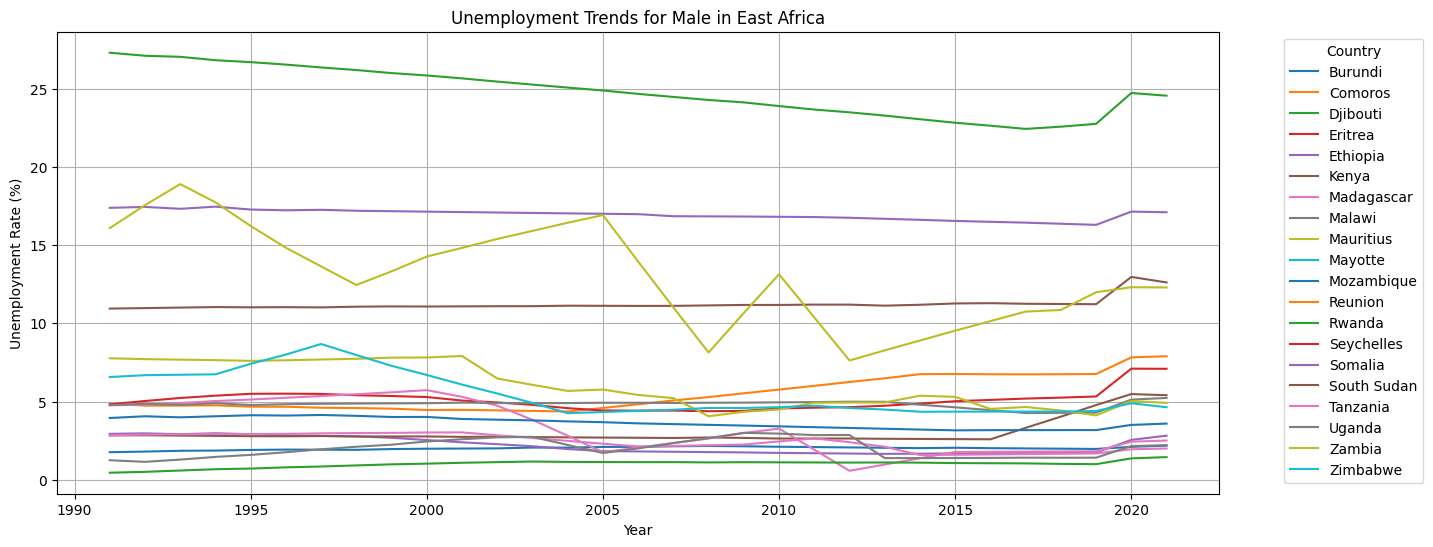

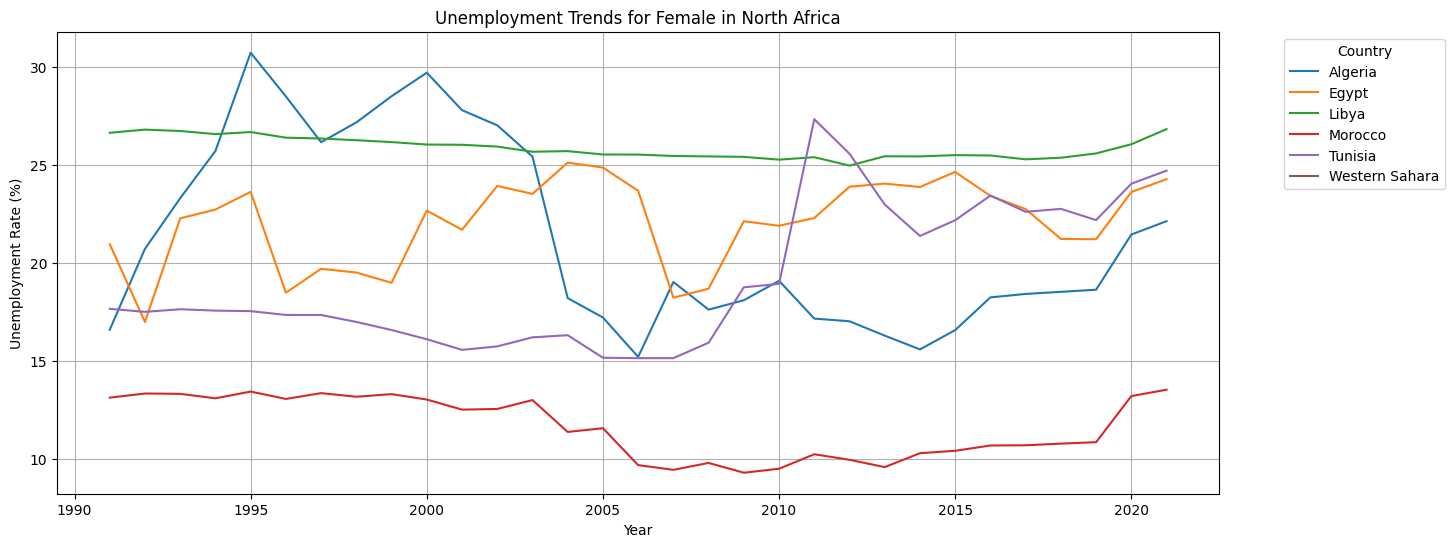

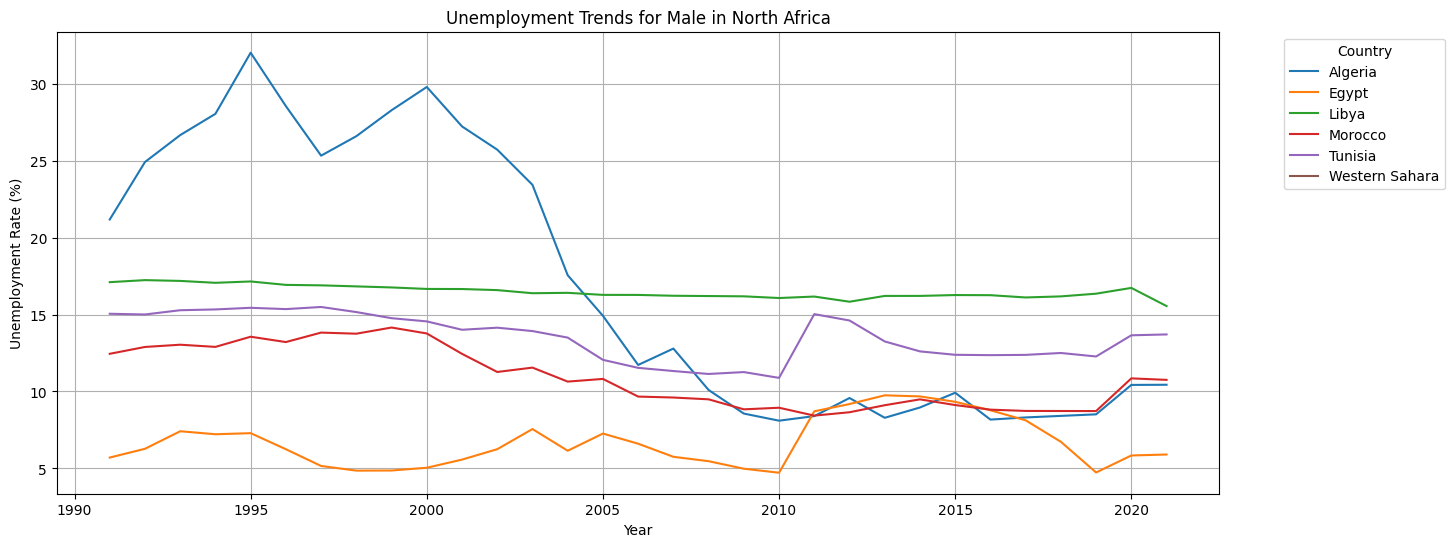

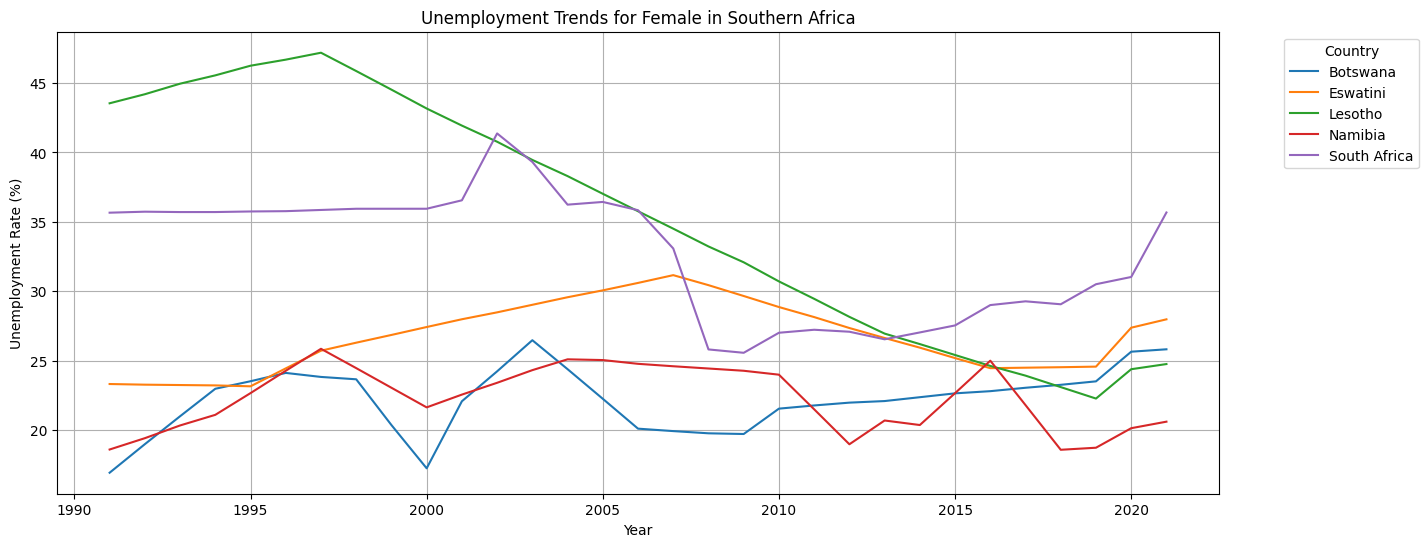

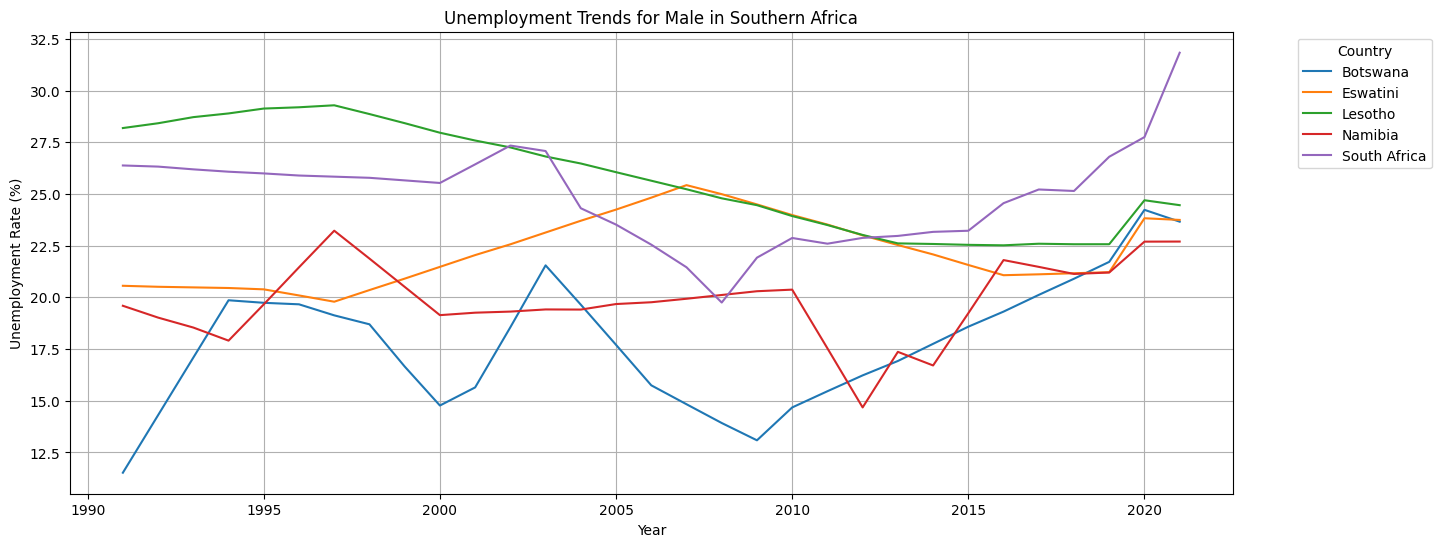

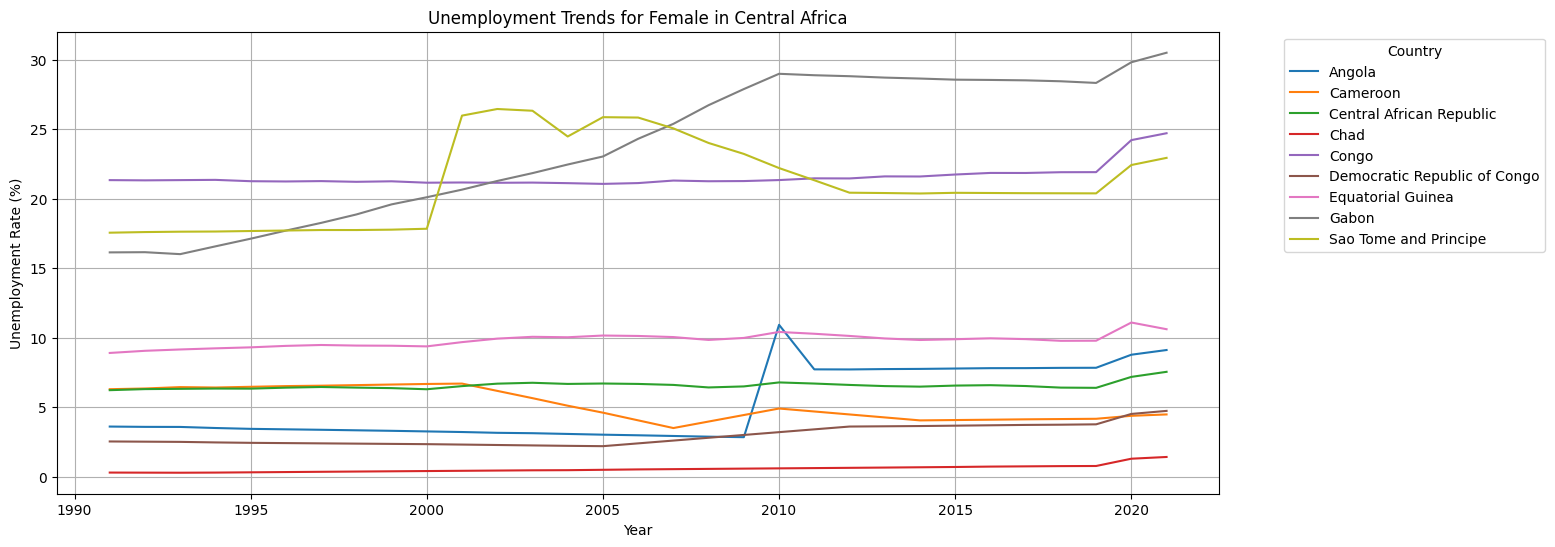

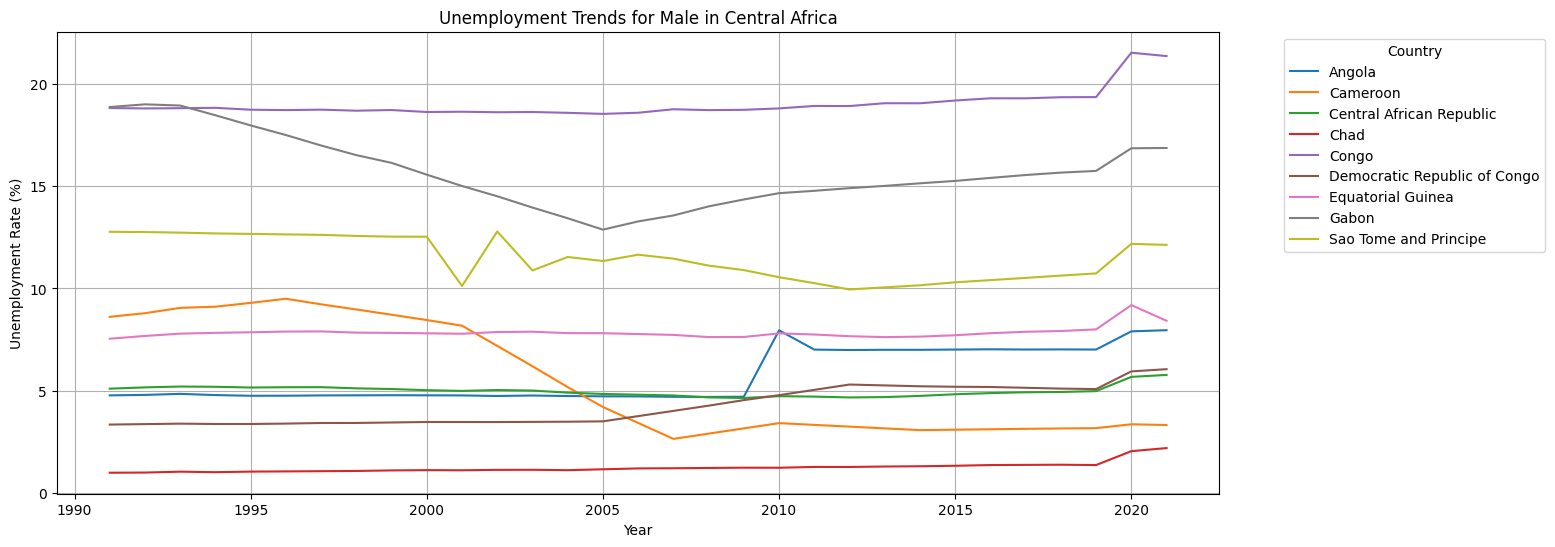

In [64]:
import matplotlib.pyplot as plt


def plot_region_gender_specific(region_name, countries, gender):
    region_df = africa_unemployment_rate[africa_unemployment_rate['Entity'].isin(countries)]
    plt.figure(figsize=(15, 6))
    for country in countries:
        country_data = region_df[region_df['Entity'] == country]
        if gender == 'female':
            plt.plot(country_data['Year'], country_data['Unemployment, female (% of female labor force) (modeled ILO estimate)'], label=f'{country}')
        elif gender == 'male':
            plt.plot(country_data['Year'], country_data['Unemployment, male (% of male labor force) (modeled ILO estimate)'], label=f'{country}')
    plt.title(f'Unemployment Trends for {gender.capitalize()} in {region_name}')
    plt.ylabel('Unemployment Rate (%)')
    plt.xlabel('Year')
    plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()

# Plot data for each region and gender
for region, countries in regions.items():
    plot_region_gender_specific(region, countries, 'female')
    plot_region_gender_specific(region, countries, 'male')


        The unemployment trends across different regions of Africa reveal several insights:

| Region        | Interpretation                                                                                                                                                                                                                                                                                                                          |
|---------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Central Africa| Noticeable variance between countries. Stable unemployment rates for males in Angola and Gabon, significant fluctuations in the Democratic Republic of Congo, and a steady increase in Equatorial Guinea, suggesting economic challenges.                                                                                             |
| Southern Africa | Both males and females in South Africa and Lesotho have high and rising unemployment rates, reflecting economic struggles and job market saturation. Botswana and Namibia show more stability, indicating potentially better economic management or job creation.                                                                      |
| North Africa  | General decline in unemployment rates over time for both genders, with fluctuations. Libya shows a sharp increase in unemployment rates for both genders around 2011, coinciding with the onset of civil conflict, highlighting the impact of political stability on employment.                                                       |
| East Africa   | Relatively low unemployment rates for males compared to other regions, with countries like Kenya showing an increase, potentially due to population growth outpacing job creation. Similar trends for females but with higher unemployment rates, indicating a gender disparity in job availability.                                   |
| West Africa   | Rising unemployment rates for males in recent years in countries like Nigeria and Senegal, suggesting economic downturns or job market issues. Generally higher rates with more variability for females, which could point to a combination of socio-economic factors affecting female employment more acutely.                            |


### Regions where gender disparity in unemployment is more pronounced? How has this disparity changed over time within each region?


C:\Users\pault\AppData\Local\Temp\ipykernel_17708\3209646729.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\pault\AppData\Local\Temp\ipykernel_17708\3209646729.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



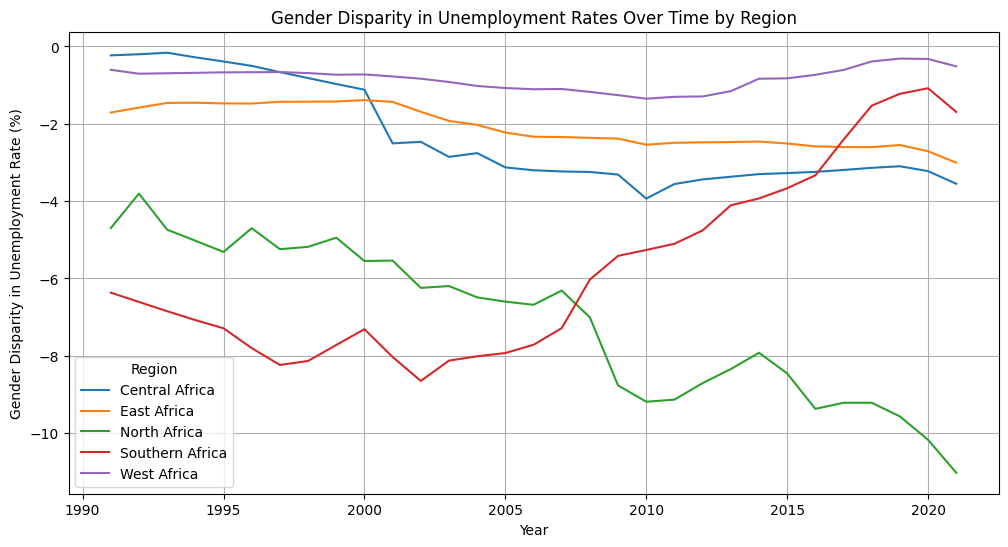

In [68]:

# Assuming africa_unemployment_rate is your DataFrame
# Define your regions dictionary
regions = {
    'West Africa': ['Benin', 'Burkina Faso', 'Cape Verde', "Cote d'Ivoire", 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Liberia', 'Mali', 'Mauritania', 'Niger', 'Nigeria', 'Senegal', 'Sierra Leone', 'Togo'],
    'East Africa': ['Burundi', 'Comoros', 'Djibouti', 'Eritrea', 'Ethiopia', 'Kenya', 'Madagascar', 'Malawi', 'Mauritius', 'Mayotte', 'Mozambique', 'Reunion', 'Rwanda', 'Seychelles', 'Somalia', 'South Sudan', 'Tanzania', 'Uganda', 'Zambia', 'Zimbabwe'],
    'North Africa': ['Algeria', 'Egypt', 'Libya', 'Morocco', 'Tunisia', 'Western Sahara'],
    'Southern Africa': ['Botswana', 'Eswatini', 'Lesotho', 'Namibia', 'South Africa'],
    'Central Africa': ['Angola', 'Cameroon', 'Central African Republic', 'Chad', 'Congo', 'Democratic Republic of Congo', 'Equatorial Guinea', 'Gabon', 'Sao Tome and Principe']
}

# Create a function to map country to region
def map_country_to_region(country):
    for region, countries in regions.items():
        if country in countries:
            return region
    return None

# Map each country in the dataset to its region
africa_unemployment_rate['Region'] = africa_unemployment_rate['Entity'].apply(map_country_to_region)

# Calculate the gender disparity
africa_unemployment_rate['Gender Disparity'] = africa_unemployment_rate['Unemployment, male (% of male labor force) (modeled ILO estimate)'] - africa_unemployment_rate['Unemployment, female (% of female labor force) (modeled ILO estimate)']

# Group by Year and Region, and calculate the mean disparity for each group
disparity_by_year_region = africa_unemployment_rate.groupby(['Year', 'Region'])['Gender Disparity'].mean().reset_index()

# Pivot the data for plotting
disparity_pivot = disparity_by_year_region.pivot(index='Year', columns='Region', values='Gender Disparity')

# Plotting
plt.figure(figsize=(12, 6))
for region in disparity_pivot.columns:
    plt.plot(disparity_pivot.index, disparity_pivot[region], label=region)

plt.title('Gender Disparity in Unemployment Rates Over Time by Region')
plt.xlabel('Year')
plt.ylabel('Gender Disparity in Unemployment Rate (%)')
plt.legend(title='Region')
plt.grid(True)
plt.show()


| Region        | Interpretation                                                                                                                                                                                                                                  |
|---------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Central Africa| Shows the most significant gender disparity, with women consistently facing higher unemployment rates than men.                                                                                                                                   |
| East Africa   | Exhibits a moderate but increasing disparity, suggesting that despite economic progress, women may not be benefiting equally in terms of job opportunities.                                                                                   |
| North Africa  | Reflects a steady gender disparity, which could be attributed to cultural or systemic factors that limit women's participation in the workforce.                                                                                                |
| Southern Africa | Presents a unique trend where the disparity initially decreases, potentially due to policies enhancing female employment, before the gap widens again, indicating a potential reversal of these gains.                                          |
| West Africa   | Shows the most improvement, with a declining trend in gender disparity, suggesting effective interventions or economic conditions that have improved employment rates for women relative to men.                                                 |


In [73]:


# Calculate the average unemployment rate as the mean of male and female rates
africa_unemployment_rate['Average Unemployment Rate'] = africa_unemployment_rate[['Unemployment, female (% of female labor force) (modeled ILO estimate)', 'Unemployment, male (% of male labor force) (modeled ILO estimate)']].mean(axis=1)

# Group by country and calculate the mean of the average unemployment rates
avg_unemployment_by_country = africa_unemployment_rate.groupby('Entity')['Average Unemployment Rate'].mean()

# Find the top 5 countries with the highest average unemployment rates in each region
top_countries_by_region = {}
for region in regions:
    region_countries = avg_unemployment_by_country.loc[regions[region]].sort_values(ascending=False).head(5)
    top_countries_by_region[region] = region_countries

# # Display the top 5 countries for each region
# for region, top_countries in top_countries_by_region.items():
#     print(f"{region} - Top 5 Countries with Highest Average Unemployment:")
#     print(top_countries)
#     print("\n")


C:\Users\pault\AppData\Local\Temp\ipykernel_17708\3445671784.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



    West Africa - Top 5 Countries with Highest Average Unemployment
| Entity      | Average Unemployment Rate (%) |
|-------------|-------------------------------|
| Cape Verde  | 11.55                         |
| Mauritania  | 10.66                         |
| Gambia      | 9.77                          |
| Senegal     | 7.08                          |
| Mali        | 6.83                          |

    East Africa - Top 5 Countries with Highest Average Unemployment
| Entity       | Average Unemployment Rate (%) |
|--------------|-------------------------------|
| Djibouti     | 31.06                         |
| Somalia      | 20.40                         |
| Zambia       | 13.16                         |
| South Sudan  | 12.25                         |
| Mauritius    | 9.16                          |

    North Africa - Top 5 Countries with Highest Average Unemployment
| Entity   | Average Unemployment Rate (%) |
|----------|-------------------------------|
| Libya    | 21.18                         |
| Algeria  | 19.24                         |
| Tunisia  | 16.36                         |
| Egypt    | 14.39                         |
| Morocco  | 11.28                         |

    Southern Africa - Top 5 Countries with Highest Average Unemployment
| Entity        | Average Unemployment Rate (%) |
|---------------|-------------------------------|
| Lesotho       | 30.55                         |
| South Africa  | 28.85                         |
| Eswatini      | 24.50                         |
| Namibia       | 21.10                         |
| Botswana      | 20.00                         |

    Central Africa - Top 5 Countries with Highest Average Unemployment
| Entity                   | Average Unemployment Rate (%) |
|--------------------------|-------------------------------|
| Congo                    | 20.29                         |
| Gabon                    | 19.73                         |
| Sao Tome and Principe    | 16.33                         |
| Equatorial Guinea        | 8.83                          |
| Central African Republic | 5.77                          |


### Unemployment Rates vs Nation's Strategy

The existence and operationalization of a national strategy for youth employment can play a critical role in mitigating unemployment rates, especially among young populations. Such strategies often encompass a wide range of interventions, from vocational training and education reforms to entrepreneurship programs and job creation initiatives.

In [78]:
# strategy_youth_employment.head()
strategy_youth_employment.rename({"8.b.1 - Existence of a developed and operationalized national strategy for youth employment, as a distinct strategy or as part of a national employment strategy - SL_CPA_YEMP":"strategy"},
                                 axis=1, inplace=True)

merged_employment_strategy = pd.merge(africa_unemployment_rate, strategy_youth_employment, on=['Entity', 'Code', 'Year'])

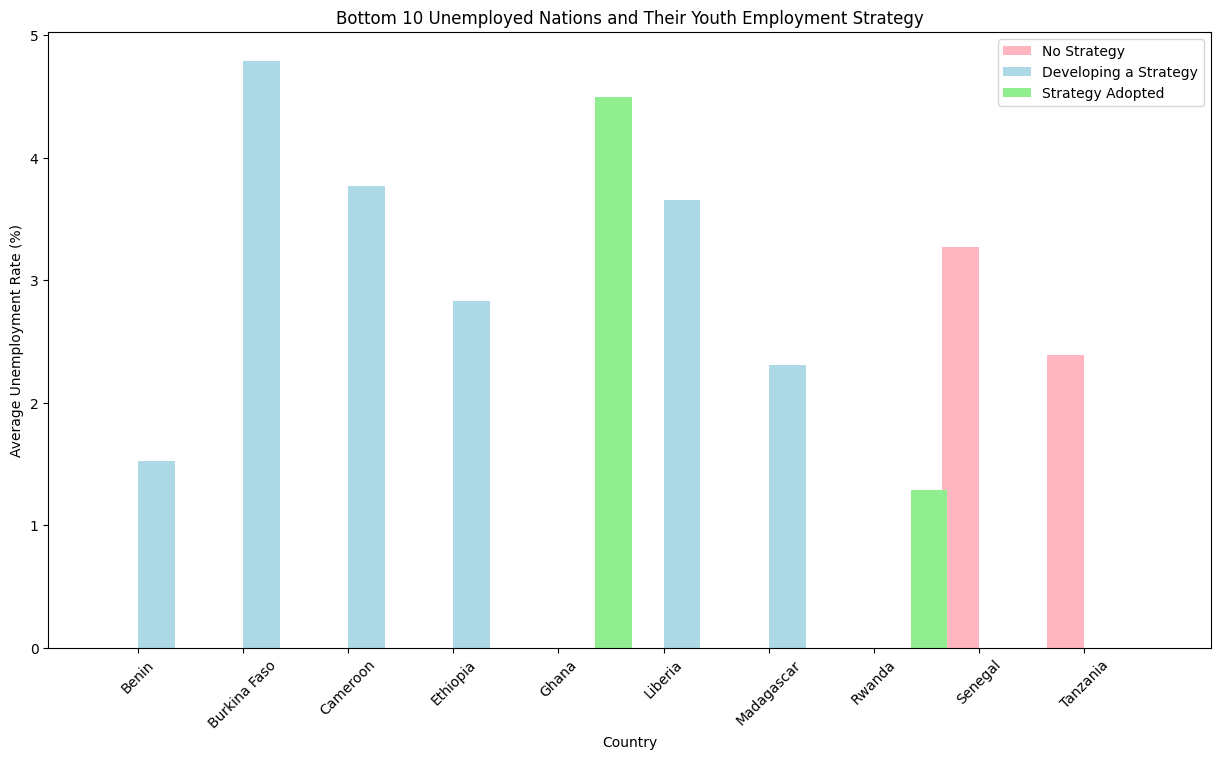

In [101]:

# Calculate the average unemployment rate for each country
avg_unemployment = merged_employment_strategy.groupby('Entity')['Average Unemployment Rate'].mean()

# Get the bottom 10 countries with the lowest average unemployment rate
bottom_10_unemployed_countries = avg_unemployment.nsmallest(10)

# Merge to get the strategy for these bottom 10 countries
bottom_10_strategy = pd.merge(bottom_10_unemployed_countries, strategy_youth_employment, left_index=True, right_on='Entity')

# Get the latest strategy status for each of these countries
bottom_10_strategy_latest = bottom_10_strategy.drop_duplicates(subset=['Entity'], keep='last')

# Sort the DataFrame by 'Average Unemployment Rate' in ascending order
bottom_10_strategy_sorted = bottom_10_strategy_latest.sort_values(by='Average Unemployment Rate')


# Create a pivot table for plotting
pivot_data = bottom_10_strategy_sorted.pivot(index='Entity', columns='strategy', values='Average Unemployment Rate').fillna(0)

strategy_labels = ['No Strategy', 'Developing a Strategy', 'Strategy Adopted', 'Strategy Operationalised']
# colors = ['orange', 'brown', 'green', 'blue']  # Adjust colors as needed 
colors = ['#FFB6C1', '#ADD8E6', '#90EE90', '#FADADD']  # Light Pink, Light Blue, Light Green, Pale Lavender


# Plotting
fig, ax = plt.subplots(figsize=(15, 8))
bar_width = 0.35
index = np.arange(len(pivot_data))

# Create a bar for each strategy stage
for i, strategy in enumerate(pivot_data.columns):
    ax.bar(index + i * bar_width, pivot_data[strategy], bar_width, label=strategy_labels[i], color=colors[i])

ax.set_xlabel('Country')
ax.set_ylabel('Average Unemployment Rate (%)')
ax.set_title('Bottom 10 Unemployed Nations and Their Youth Employment Strategy')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(pivot_data.index)
ax.legend()

plt.xticks(rotation=45)
plt.show()



The chart illustrates the average unemployment rates juxtaposed with the status of youth employment strategies for the ten African nations with the lowest unemployment. Notably, countries like Benin and Burkina Faso with relatively lower unemployment rates have no formal strategy, suggesting other factors may be contributing to their employment landscape. Conversely, Senegal, with a higher unemployment rate, has adopted a strategy, indicating a proactive response to unemployment challenges. Liberia stands out for developing a strategy amidst moderate unemployment rates. This suggests that the mere existence of a strategy does not correlate directly with low unemployment rates; effective implementation and broader economic conditions are likely influential.

>       Unemployment Rates vs Nation's Strategy (by Region)

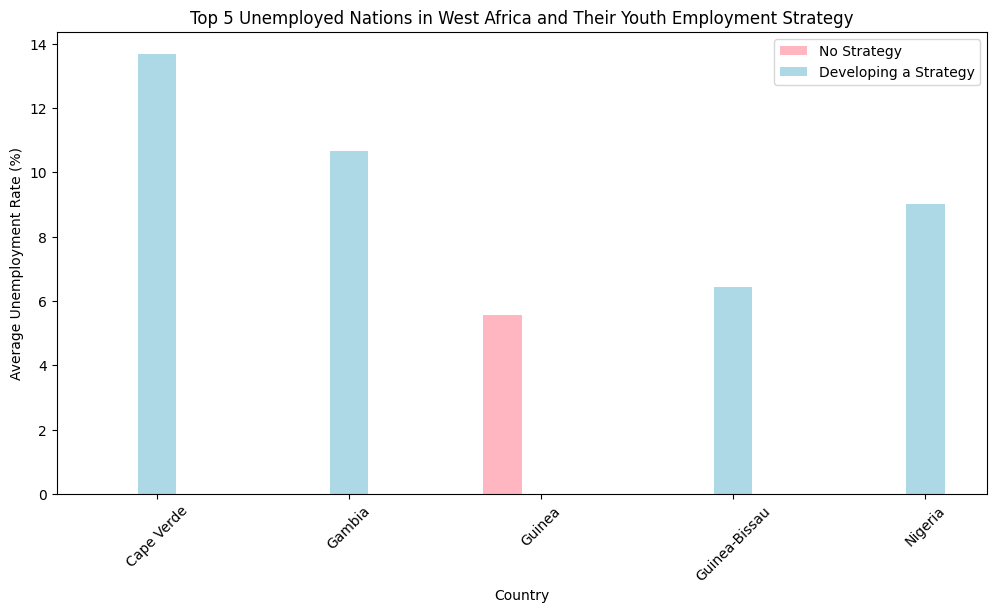

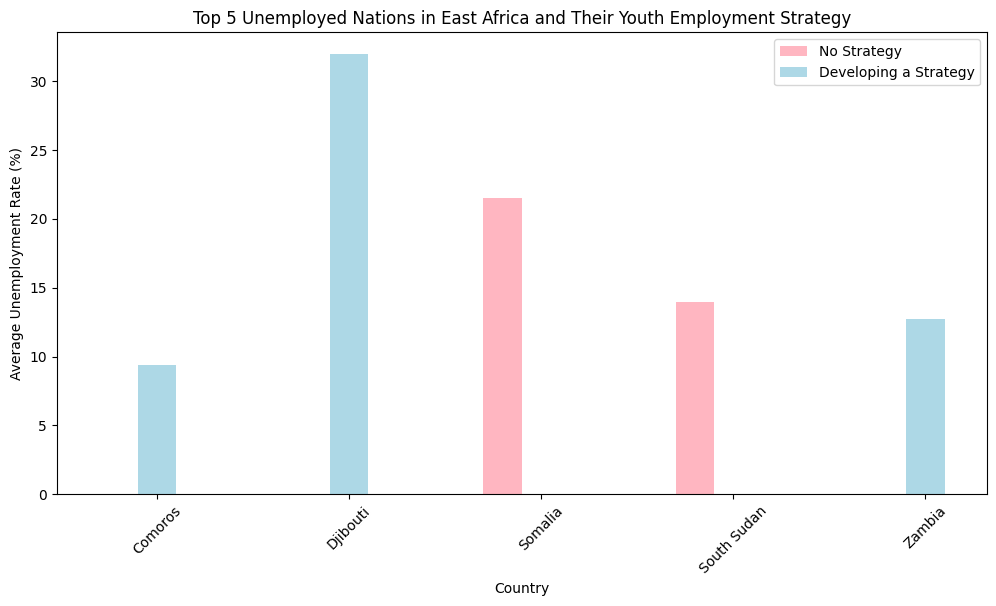

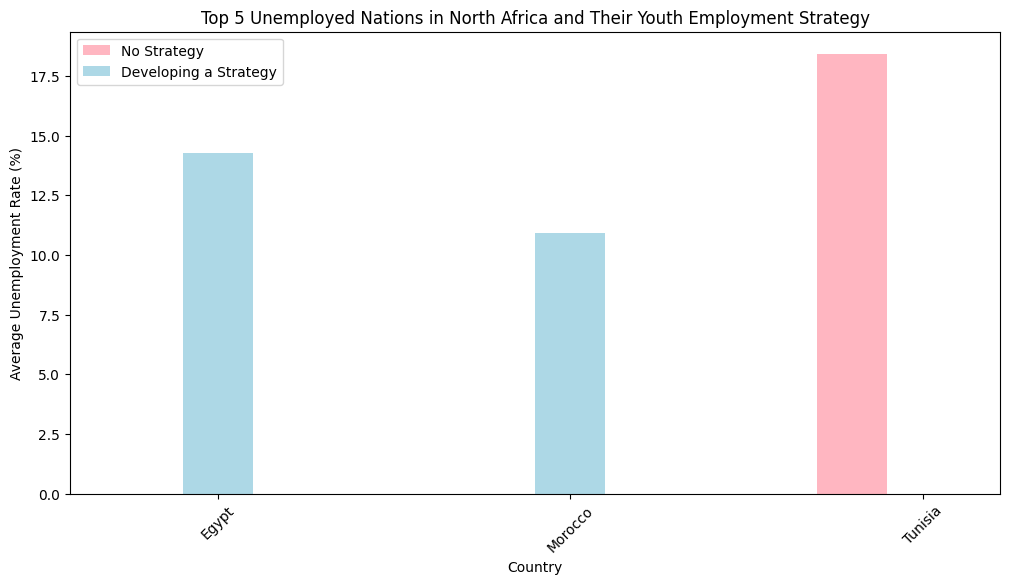

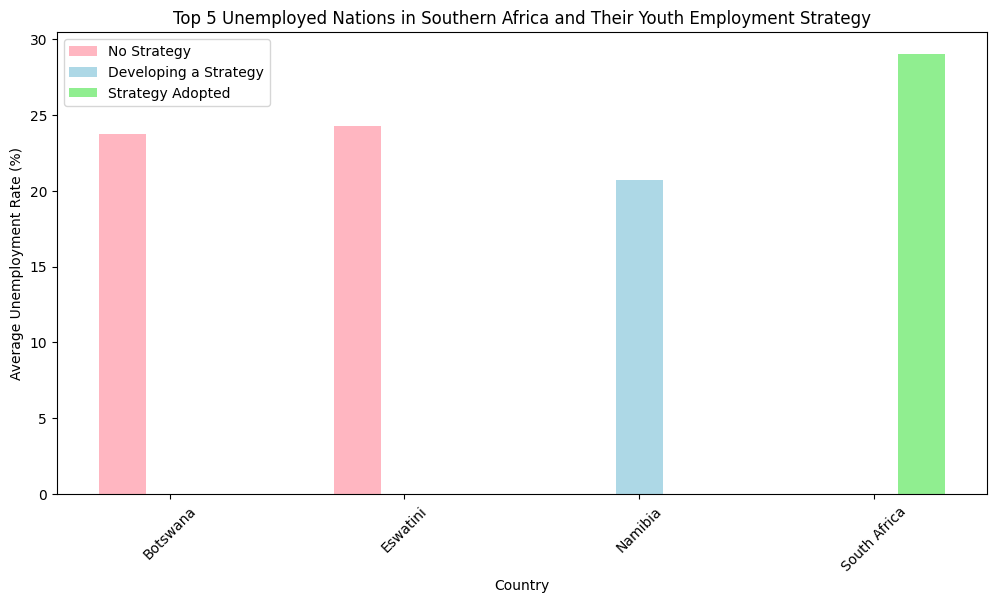

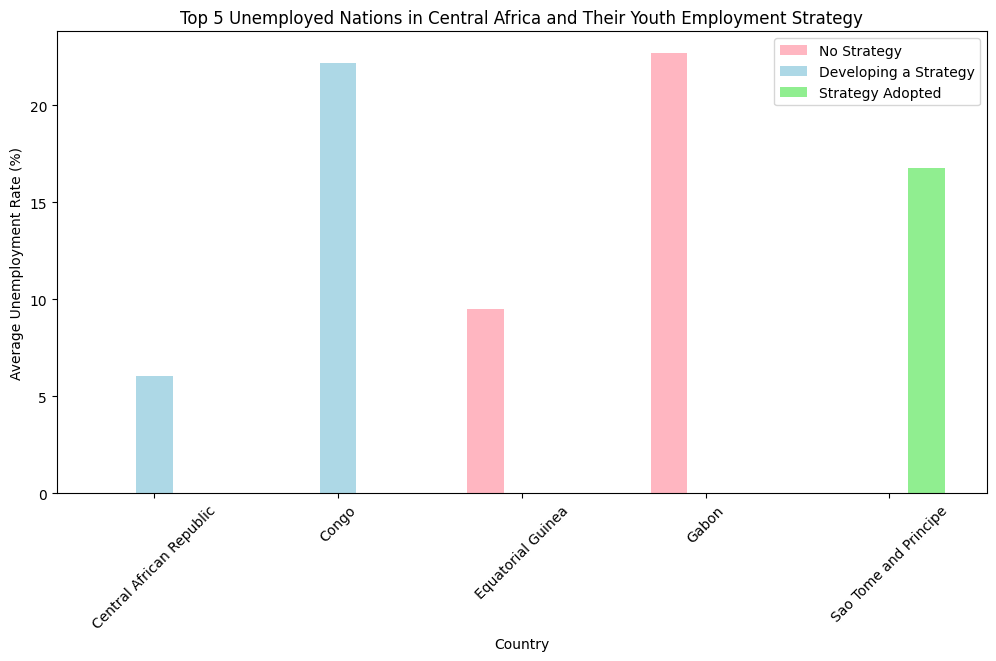

In [104]:
def plot_for_region(region_name, countries):
    # Filter for the region's countries
    region_data = merged_employment_strategy[merged_employment_strategy['Entity'].isin(countries)]
    
    # Calculate average unemployment rates for each country and get the top 5
    top_countries = region_data.groupby('Entity')['Average Unemployment Rate'].mean().nlargest(5)
    
    # Get the latest strategy value for each of the top countries
    latest_strategy_data = strategy_youth_employment[strategy_youth_employment['Entity'].isin(top_countries.index)].drop_duplicates(subset=['Entity'], keep='last')
    
    # Merge to get the strategy for these top 5 countries
    top_countries_strategy = pd.merge(top_countries, latest_strategy_data, left_index=True, right_on='Entity')
    
    # Pivot for plotting
    pivot_data = top_countries_strategy.pivot(index='Entity', columns='strategy', values='Average Unemployment Rate').fillna(0)
    
    colors = ['#FFB6C1', '#ADD8E6', '#90EE90', '#FADADD']  # Light Pink, Light Blue, Light Green, Pale Lavender
    
    # Plotting
    fig, ax = plt.subplots(figsize=(12, 6))
    index = np.arange(len(pivot_data))

    for i, strategy in enumerate(pivot_data.columns):
        ax.bar(index + i * 0.2, pivot_data[strategy], 0.2, label=strategy_labels[i], color=colors[i])

    ax.set_xlabel('Country')
    ax.set_ylabel('Average Unemployment Rate (%)')
    ax.set_title(f'Top 5 Unemployed Nations in {region_name} and Their Youth Employment Strategy')
    ax.set_xticks(index + 0.2)
    ax.set_xticklabels(pivot_data.index)
    ax.legend()

    plt.xticks(rotation=45)
    plt.show()

# Plot for each region
for region, countries in regions.items():
    plot_for_region(region, countries)


Comparing the top 5 unemployed nations in each African region with their respective youth employment strategies indicate a complex relationship between unemployment rates and the presence of youth employment strategies:

>     Central Africa: 
A diverse approach to youth employment strategy is seen, yet countries like Congo and Gabon with high unemployment rates have either no strategy or are just developing one, suggesting a need for more proactive measures.

>     Southern Africa:
South Africa, despite having a developed strategy, shows a high unemployment rate, indicating that having a strategy alone may not be sufficient without effective implementation or considering other socio-economic factors.

>     North Africa:
The trends show that countries with lower unemployment rates, like Morocco, have adopted strategies, potentially pointing to the positive impact of such strategies or other concurrent economic reforms.

>     East Africa: 
There is a noticeable absence of strategies in countries with higher unemployment rates like Djibouti and Somalia, which could benefit from adopting and operationalizing youth employment strategies.

>     West Africa:
The chart suggests that countries like Nigeria with no strategy have higher unemployment rates, while a country like Ghana with an adopted strategy shows a lower rate, underscoring the potential benefits of having a formal strategy.

    These suggest that while the adoption of youth employment strategies can be correlated with lower unemployment rates, the mere existence of such strategies is not a panacea. Effective implementation, along with addressing other underlying economic issues, is crucial for these strategies to mitigate unemployment effectively.

### Analyzing Government Expenditure on Education (and its impact on Unemployment Rate)

Government expenditure on education is pivotal for shaping a capable workforce, which can reduce unemployment by enhancing job-relevant skills. When education aligns with market demands, it can fuel economic growth and innovation, creating new jobs. Strategic investment in education not only equips individuals with adaptable skills in a changing economy but also helps in attracting high-value industries, fostering long-term economic development, and potentially lowering unemployment rates.

C:\Users\pault\AppData\Local\Temp\ipykernel_17708\197025121.py:6: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



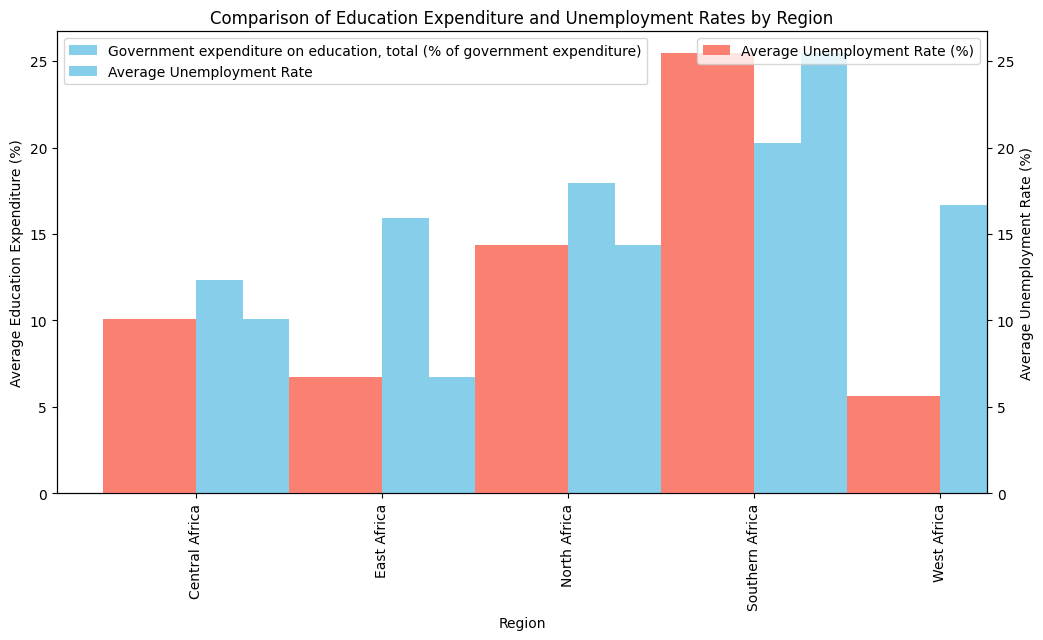

In [115]:
# Step 1: Merge the education expenditure dataset with the unemployment data
merged_education_unemployment = pd.merge(africa_unemployment_rate, africa_education_expenditure, on=['Entity', 'Code', 'Year'])

# Step 3: Regional Analysis
# Calculating average education expenditure and unemployment rate for each region
regional_averages = merged_education_unemployment.groupby('Region').mean()[['Government expenditure on education, total (% of government expenditure)', 'Average Unemployment Rate']]


# Regional comparison plot
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()
regional_averages.plot(kind='bar', ax=ax1, position=0, color='skyblue', label='Average Education Expenditure (%)')
regional_averages['Average Unemployment Rate'].plot(kind='bar', ax=ax2, position=1, color='salmon', label='Average Unemployment Rate (%)')
ax1.set_ylabel('Average Education Expenditure (%)')
ax2.set_ylabel('Average Unemployment Rate (%)')
plt.title('Comparison of Education Expenditure and Unemployment Rates by Region')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()


A comparison between the average government expenditure on education and average unemployment rates across regions in Africa. It reveals that a higher budget allocation for education does not necessarily correlate with lower unemployment rates. For instance, North Africa exhibits significant educational spending, yet it also has a high unemployment rate, suggesting that factors beyond educational investment influence joblessness. Conversely, West Africa shows a lower investment in education but also lower unemployment rates, indicating that efficient use of educational funds or other economic factors may be at play.

In addition, assessing the impact of government expenditure on education on unemployment rates requires a longitudinal approach. Education is a long-term investment with delayed payoffs. It takes years for individuals to complete their education, acquire skills, and become active participants in the job market. Hence, the above plot may not give the full picture of the impact of government expenditure on education on unemployment rates

>       Countries with a decline in Government expenditure on education over a 5-year period and its impact on unemployment rates

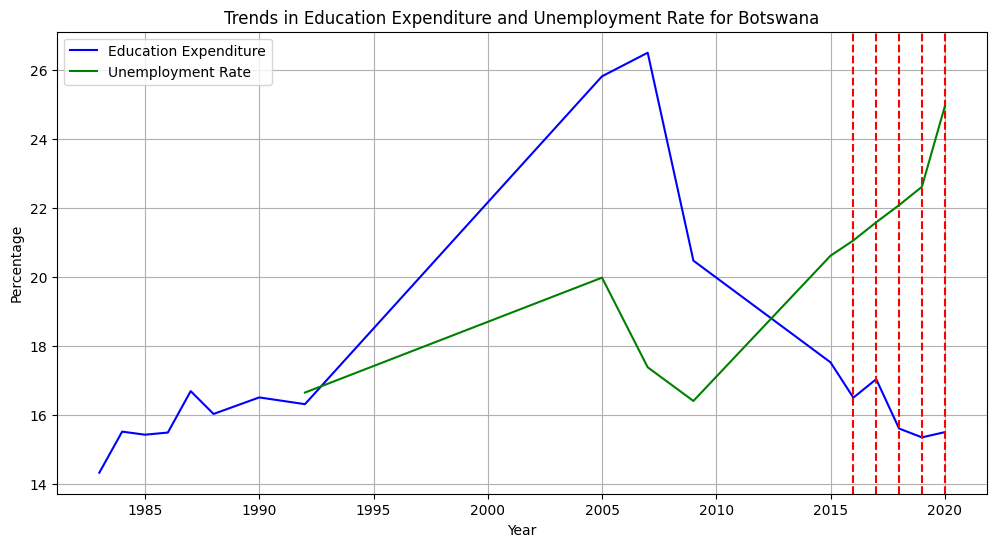

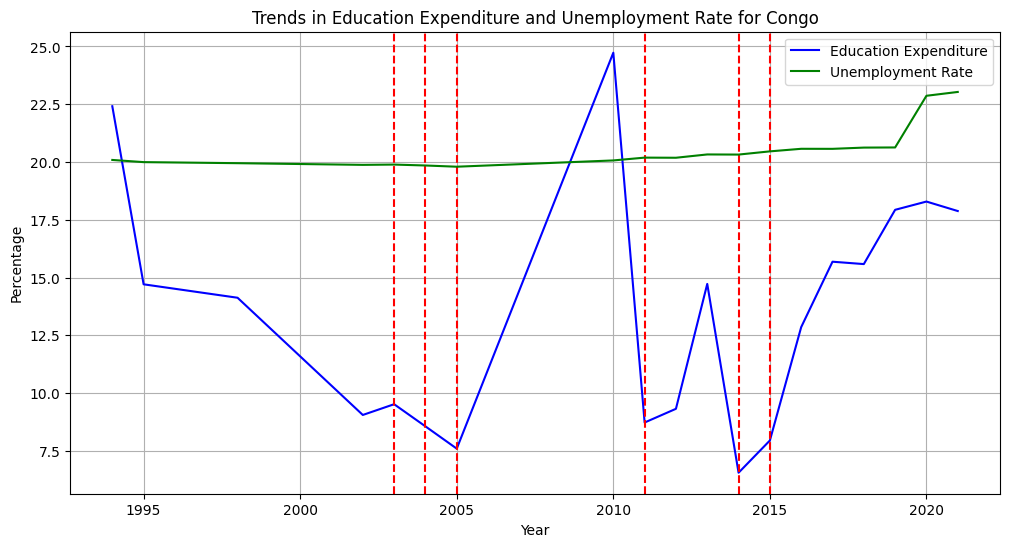

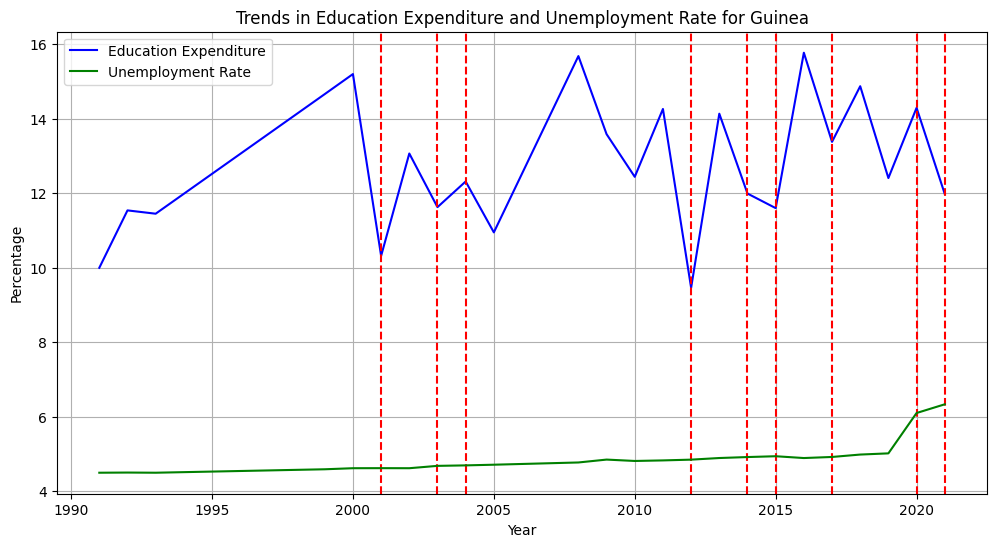

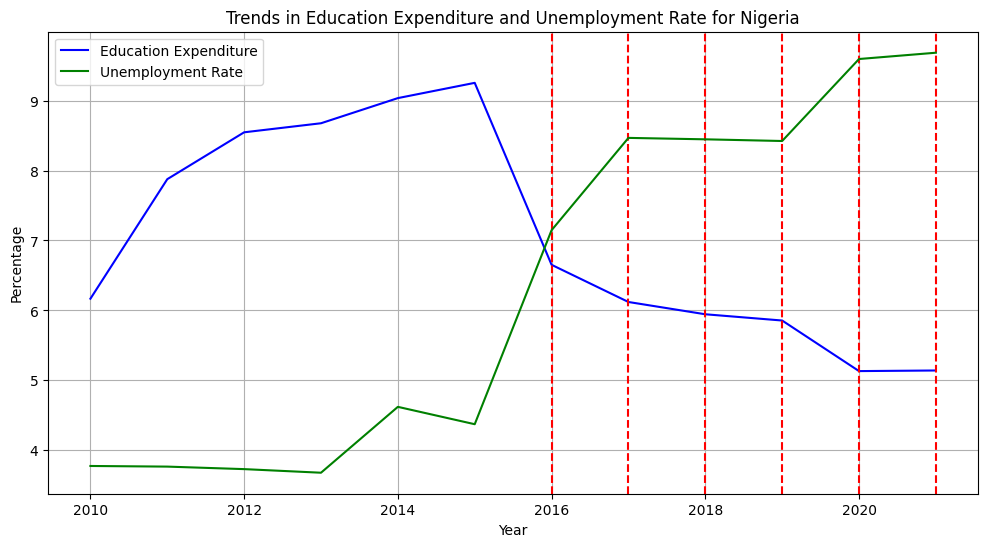

In [220]:

np.random.seed(16)

# Randomly select 5 countries
random_countries = np.random.choice(merged_education_unemployment['Entity'].unique(), 5, replace=False)

for country in random_countries:
    country_data = merged_education_unemployment[merged_education_unemployment['Entity'] == country].copy()
    country_data.sort_values('Year', inplace=True)

    # Rolling calculation to find 5-year decline in education expenditure
    country_data['Rolling Expenditure'] = country_data['Government expenditure on education, total (% of government expenditure)'].rolling(window=5).apply(lambda x: x.iloc[-1] < x.iloc[0] if not x.isnull().any() else False)

    # Filtering periods with a decline in expenditure
    decline_periods = country_data[country_data['Rolling Expenditure'] == 1]

    if not decline_periods.empty:
        plt.figure(figsize=(12, 6))

        # Plot education expenditure
        plt.plot(country_data['Year'], country_data['Government expenditure on education, total (% of government expenditure)'], label='Education Expenditure', color='blue')

        # Highlight decline periods
        for year in decline_periods['Year']:
            plt.axvline(x=year, color='red', linestyle='--')

        # Plot unemployment rate
        plt.plot(country_data['Year'], country_data['Average Unemployment Rate'], label='Unemployment Rate', color='green')

        plt.title(f'Trends in Education Expenditure and Unemployment Rate for {country}')
        plt.xlabel('Year')
        plt.ylabel('Percentage')
        plt.legend()
        plt.grid(True)
        plt.show()


The areas marked by red dashed vertical lines indicate periods of decreased government expenditure on education over a 5-year period, here are the observations regarding their impact on unemployment rates within those countries:

>       Nigeria: 
The decrease in education expenditure starting around 2015 corresponds with a subsequent rise in the unemployment rate. The proximity of the changes suggests a potential correlation where reduced investment in education may have contributed to higher unemployment.

>       Guinea: 
Despite fluctuations in education expenditure, the unemployment rate remains largely unaffected and low. This may indicate that in Guinea, factors other than education expenditure have a more substantial impact on employment, or that the job market may be less sensitive to such changes.

>       Congo: 
There is a sharp decline in education expenditure around 2010, which is followed by a sharp increase in the unemployment rate. This suggests a possible link where cuts in education funding could be affecting the employability or job creation within the country.

>       Botswana: 
There's a marked decline in education expenditure around 2010, followed by a sharp increase in the unemployment rate. This pattern is consistent with the hypothesis that reduced education funding can negatively impact employment rates.


    In summary, in Nigeria, Congo, and Botswana, there is a visible trend where a decrease in education expenditure is followed by an increase in unemployment rates within the 5-year periods marked by the red dashed lines. However, in Guinea, the unemployment rate does not show a similar pattern, remaining low regardless of changes in education spending. This suggests that while there can be a relationship between education spending and employment, it is not uniform across different countries and could be influenced by a variety of local economic and social factors.

### Total Firms (Historical Data)

For unemployment to decrease, there need to be individuals willing to invest in the country, and more companies springing forth. In addition, increase in SMEs can also reduce unemployment as there are now more job opportunities available.

In [125]:
africa_firms_historical.head()

,Economy,Adult population,Year,TOTAL Number of \nLimited Liability Companies,Total business density rate
25,Algeria,22354242.0,2006.0,45055.0,2.015501
26,Algeria,22845303.0,2007.0,51909.0,2.272196
27,Algeria,23315424.0,2008.0,53825.0,2.308558
28,Algeria,23766657.0,2009.0,59346.0,2.497028
29,Algeria,24198798.0,2010.0,61674.0,2.548639


> Private Sector Growth and Employment Trends

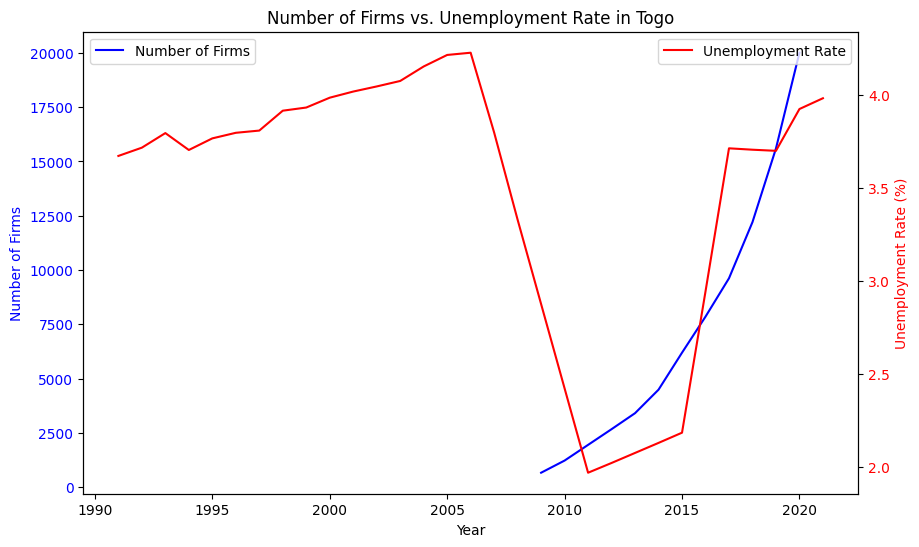

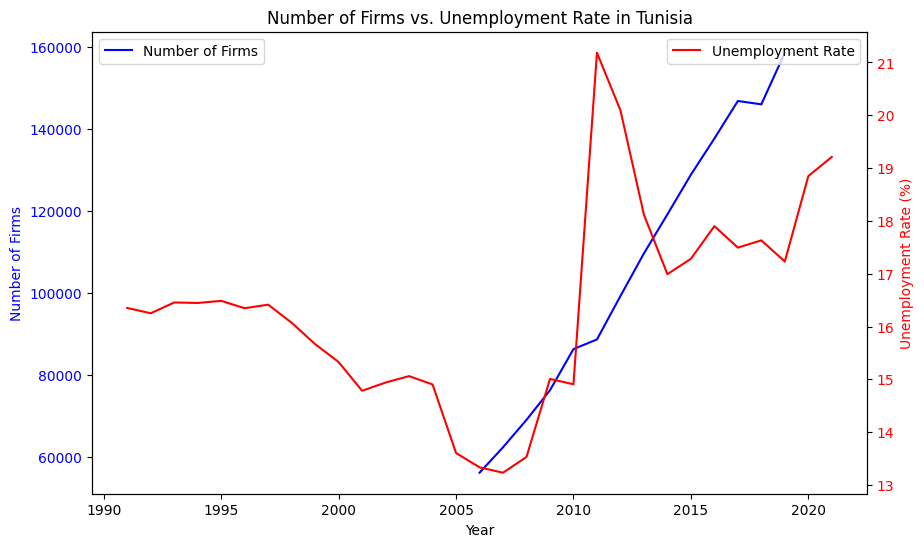

In [184]:
np.random.seed(36)

# Randomly select a few countries (let's say 5)
random_countries_2 = np.random.choice(africa_firms_historical['Economy'].unique(), 2, replace=False)

for country in random_countries_2:
    firm_data = africa_firms_historical[africa_firms_historical['Economy'] == country]
    unemployment_data = africa_unemployment_rate[africa_unemployment_rate['Entity'] == country]

    fig, ax1 = plt.subplots(figsize=(10, 6))

    ax1.plot(firm_data['Year'], firm_data['TOTAL Number of \nLimited Liability Companies'], color='blue', label='Number of Firms')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Number of Firms', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    ax2 = ax1.twinx()
    ax2.plot(unemployment_data['Year'], unemployment_data['Average Unemployment Rate'], color='red', label='Unemployment Rate')
    ax2.set_ylabel('Unemployment Rate (%)', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    plt.title(f'Number of Firms vs. Unemployment Rate in {country}')
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    plt.show()


The plots for Tunisia and Togo illustrate the relationship between the number of firms (LLCs) and unemployment rates, reflecting private sector growth and its impact on employment. For Togo and Tunisia, there is a notable decline in the number of firms around 2010, which correlates with a sharp increase in the unemployment rate. This suggests that a decrease in the number of businesses can lead to higher unemployment, possibly due to fewer job opportunities.

>     Both plots support the idea that a robust and growing private sector, with an increasing number of firms, is essential for job creation and the reduction of unemployment.

>       Year-on-year increase in Number of Firms by Population 

 i made a pair plot to visualise firm growth relative to population growth in some selected African countries. It allows for the comparison of year-on-year changes in the number of firms to the year-on-year changes in population size. 
 
 This comparative analysis can infer whether the increase in the number of firms is keeping pace with population growth. A positive correlation would suggest that the private sector is expanding in proportion to, or faster than, the population increase, potentially indicating a healthy environment for job creation and economic opportunities. Conversely, if firm growth lags behind population growth, it may imply that job opportunities are not keeping up with the growing labor force, which could lead to higher unemployment rates or underemployment.

In [212]:
# Calculate the average unemployment rate for each country
avg_unemployment = africa_unemployment_rate.groupby('Entity')['Average Unemployment Rate'].mean()

# Gsince there are only a few countries in the dataset, we will randomly select 4 countries
random_countries_3 = np.random.choice(africa_firms_historical['Economy'].unique(), 3, replace=False) 

# Filter africa_firms_historical for the top 5 countries
random_firms_data = africa_firms_historical[africa_firms_historical['Economy'].isin(random_countries_3)]

random_firms_data['Firms YoY Increase'] = random_firms_data.groupby('Economy')['TOTAL Number of \nLimited Liability Companies'].pct_change() * 100
random_firms_data['Population YoY Increase'] = random_firms_data.groupby('Economy')['Adult population'].pct_change() * 100



C:\Users\pault\AppData\Local\Temp\ipykernel_17708\3347760704.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\pault\AppData\Local\Temp\ipykernel_17708\3347760704.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



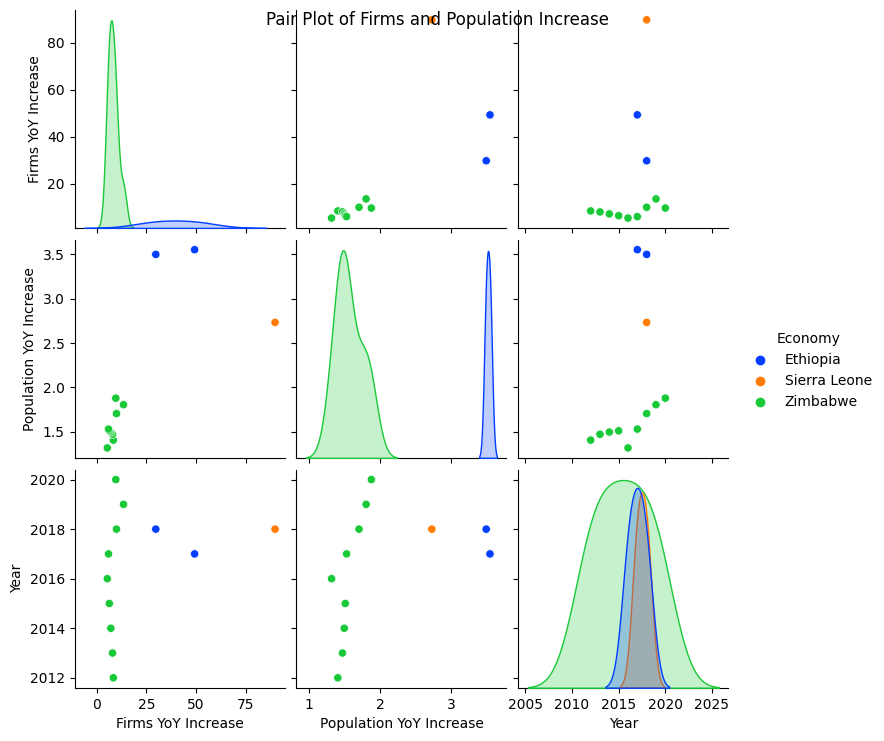

In [207]:
sns.pairplot(random_firms_data[random_firms_data['Economy'].isin(random_countries_3)], 
             vars=['Firms YoY Increase', 'Population YoY Increase', 'Year'], 
             hue='Economy', palette='bright')
plt.suptitle('Pair Plot of Firms and Population Increase')
plt.show()


The pair plot of firms and population year-on-year (YoY) increase for Ethiopia, Sierra Leone, and Zimbabwe provides a comparative analysis of economic vs. demographic growth. In general, Ethiopia shows significant spikes in firm growth, which greatly surpass population increases at certain points. This might indicate periods of strong entrepreneurial activity or economic reforms. Sierra Leone displays a more gradual increase in both firms and population, with firm growth rates modestly outpacing population growth, suggesting a steady expansion of the private sector. Zimbabwe's data points suggest variability with periods where firm growth outpaces population growth and vice versa, reflecting possible economic volatility or transition. Overall, the interplay between firm and population growth rates in these countries highlights different patterns of economic development, with Ethiopia showing the most pronounced growth in the private sector relative to population increases.

>       Countries with the Most Increase in Number of Firms:

In [214]:
# Group by country and calculate the first and last number of firms
first_firms = africa_firms_historical.groupby('Economy')['TOTAL Number of \nLimited Liability Companies'].first()
last_firms = africa_firms_historical.groupby('Economy')['TOTAL Number of \nLimited Liability Companies'].last()

# Calculate the total percentage increase
total_percentage_increase = ((last_firms - first_firms) / first_firms) * 100

# Sort the countries by the highest increase
sorted_countries = total_percentage_increase.sort_values(ascending=False)

# Display top countries with the highest increase
print("Countries with the Most Increase in Number of Firms:")
print(sorted_countries.head())



Countries with the Most Increase in Number of Firms:
Economy
Rwanda     12728.183962
Togo        2931.212121
Gabon       1041.340782
Senegal      486.740533
Morocco      346.207165
Name: TOTAL Number of \nLimited Liability Companies, dtype: float64


### Population with Access to Electricity

In [216]:
# Top countries with the most increase in number of firms
top_countries = sorted_countries.head().index

# Filter the electricity access data for the top countries
top_countries_electricity_data = africa_population_access_electricity[africa_population_access_electricity['Entity'].isin(top_countries)]

# Calculate the average electricity access for the period in the firms dataset
average_electricity_access = top_countries_electricity_data.groupby('Entity')['Access to electricity (% of population)'].mean()

# Combine this with the firms growth data
combined_data = pd.concat([sorted_countries.head(), average_electricity_access], axis=1)
combined_data.columns = ['Firms Growth (%)', 'Average Electricity Access (%)']

print(combined_data)


         Firms Growth (%)  Average Electricity Access (%)
Rwanda       12728.183962                       14.998176
Togo          2931.212121                       33.871515
Gabon         1041.340782                       84.270413
Senegal        486.740533                       47.738296
Morocco        346.207165                       80.562376


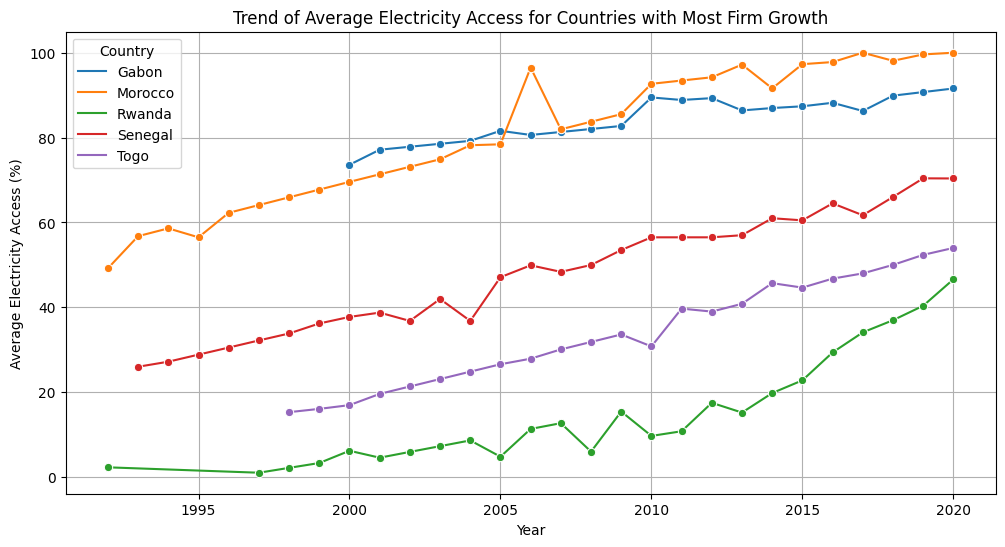

In [218]:
# Calculate the average electricity access for the period in the firms dataset
average_electricity_access = top_countries_electricity_data.groupby(['Entity', 'Year'])['Access to electricity (% of population)'].mean().reset_index()

# Filter the data to include only the top countries
top_countries_average_electricity = average_electricity_access[average_electricity_access['Entity'].isin(top_countries)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=top_countries_average_electricity, x='Year', y='Access to electricity (% of population)', hue='Entity', marker='o')
plt.title('Trend of Average Electricity Access for Countries with Most Firm Growth')
plt.xlabel('Year')
plt.ylabel('Average Electricity Access (%)')
plt.legend(title='Country')
plt.grid(True)
plt.show()


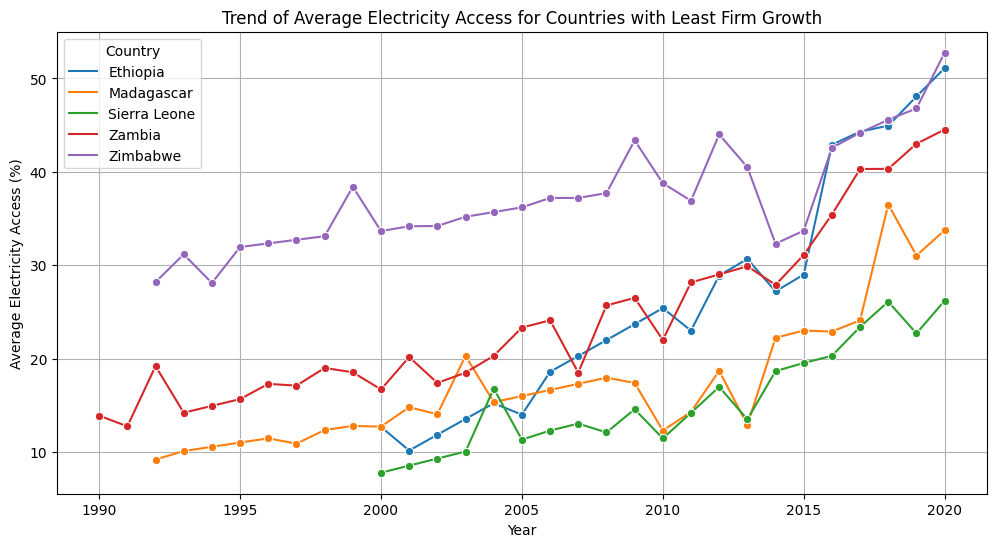

In [219]:
# Bottom countries with the least increase in number of firms
bottom_countries = sorted_countries.tail().index

# Filter the electricity access data for the bottom countries
bottom_countries_electricity_data = africa_population_access_electricity[africa_population_access_electricity['Entity'].isin(bottom_countries)]

# Calculate the average electricity access for each year in the bottom countries
average_electricity_access_bottom = bottom_countries_electricity_data.groupby(['Entity', 'Year'])['Access to electricity (% of population)'].mean().reset_index()

# Plotting the trend
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=average_electricity_access_bottom, x='Year', y='Access to electricity (% of population)', hue='Entity', marker='o')
plt.title('Trend of Average Electricity Access for Countries with Least Firm Growth')
plt.xlabel('Year')
plt.ylabel('Average Electricity Access (%)')
plt.legend(title='Country')
plt.grid(True)
plt.show()


The two plots illustrate the relationship between firm growth and access to electricity in selected African countries, comparing the top 5 countries with the most firm growth to the bottom 5 with the least.

>       Plot A: Trend of Average Electricity Access for Countries with Most Firm Growth
In the first plot, countries with the most firm growth (Gabon, Morocco, Rwanda, Senegal, Togo). Here, the upward trends in electricity access are more pronounced. Gabon and Morocco maintain relatively high levels of access, possibly facilitating business operations and growth. Rwanda and Senegal show significant improvements in access over time, which likely contributes to their firm growth. Togo, despite lower overall access, also displays a steady increase, suggesting improvements in infrastructure that could support economic activity.

>       Plot B: Trend of Average Electricity Access for Countries with Least Firm Growth
The second plot shows countries with the least firm growth (Ethiopia, Madagascar, Sierra Leone, Zambia, Zimbabwe) show varied trends in electricity access. Ethiopia, for instance, demonstrates a remarkable increase in access to electricity after 2010, which may support firm growth in the future. Madagascar and Sierra Leone depict gradual improvements, while Zambia and Zimbabwe show more volatile access trends.


> These plots suggest that electricity access is a critical factor for firm growth, with countries showing increased access to electricity generally experiencing more firm growth. Increased access to electricity is a fundamental component of economic development, which can encourage the establishment and expansion of firms. More firms in a country can lead to more job opportunities, which could potentially lower unemployment rates.

### Summary


>       Unemployment Rates by Geopolitical Regions
Our comprehensive analysis of unemployment in Africa utilized a data-driven approach to unravel the multifaceted challenges of joblessness across the continent. By examining unemployment rates, we observed significant regional disparities. Certain regions demonstrated stable or declining trends, while others, particularly in Central and Southern Africa, faced persistently high unemployment rates.

>       Unemployment rates - Gender Disparity
Gender disparity emerged as a notable concern, with female unemployment rates generally surpassing those of males, suggesting ingrained socio-economic and possibly cultural barriers to women's participation in the workforce. The examination of national youth employment strategies indicated that the mere existence of these strategies does not correlate straightforwardly with lower unemployment rates. This finding points to the necessity for the effective implementation and regular assessment of these strategies, ensuring they are responsive to economic shifts and labor market demands.

>       Youth Employment Strategy vs. unemployment Rates
The impact of youth employment strategy on unemployment rates suggests that while the adoption of youth employment strategies can be correlated with lower unemployment rates, the mere existence of such strategies is not a panacea. Effective implementation, along with addressing other underlying economic issues, is crucial for these strategies to mitigate unemployment effectively.

>       Government expenditure on Education on unemployment Rates
The impact of government expenditure on education on unemployment rates was found to be complex. While higher investment in education is generally perceived as beneficial for equipping the youth with employable skills, the data suggested that immediate effects on unemployment rates might not be directly observable due to the time lag between education investment and workforce entry. Additionally, the presence of external factors, such as economic diversification and infrastructural development (like access to electricity), was identified as having potential influence on the private sector's health and, consequently, employment rates.

The initial set of plots related to Nigeria, Guinea, Congo, and Botswana showed that decreases in government expenditure on education often preceded increases in unemployment rates. This suggests that reduced investment in education may impair the workforce's ability to adapt to evolving job markets, although the effect varies by country and is not a universal predictor of unemployment rates.

>       Firm Growth vs. Population Increase vs. Unemployment
The pair plot for Ethiopia, Sierra Leone, and Zimbabwe highlighted that firm growth does not always align with population growth. Ethiopia's pronounced spikes in firm growth contrast with Sierra Leone's and Zimbabwe's more modest increases. This suggests that while entrepreneurial activity is booming in some areas, it may not be sufficient to absorb the growing population into the workforce in others.

The visualizations for Tunisia and Togo reinforced the notion that a decline in the number of firms correlates with rising unemployment rates, underlining the importance of a robust private sector in job creation.

>       Electricity Access and Firm Growth vs. Unemployment
The plots comparing the top and bottom five countries with respect to firm growth and electricity access provided insights into the role of infrastructure in economic development. Countries with increasing access to electricity generally saw more firm growth, which is likely to stimulate employment opportunities and combat unemployment.

>       Conclusion
Through the lens of data, it became evident that tackling unemployment in Africa is not a one-size-fits-all scenario. It requires targeted interventions considering regional specificities, gender inclusivity, and strategic investment in education and economic diversification. The insights from our analysis underline the importance of real-time data monitoring to inform dynamic policy-making, regional cooperation to address transnational employment challenges, and the cultivation of environments conducive to business growth and innovation.

### Recommendations

To tackle unemployment in Africa, a multipronged strategy is essential. Investing in education and vocational training that align with current market demands will create a skilled workforce ready for tomorrow's jobs. Strengthening infrastructure, particularly electricity and digital connectivity, will underpin economic growth and firm expansion. Encouraging entrepreneurship through easier access to finance and streamlined business regulations can spur private sector development, a critical engine for job creation. Additionally, fostering sectors with high growth potential, such as agriculture and technology, can open new employment avenues. Finally, establishing robust social safety nets and promoting regional economic integration will cushion against joblessness and encourage a broader, more resilient job market. Tailoring these strategies to individual country contexts will be key to their success.